<a href="https://colab.research.google.com/github/youngmantis/2023-NIgeria-Presidential-Election-Results-Analysis-and-Visualization/blob/main/Modified_2023_Nigeria_Presidential_Election_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2023 Nigeria Presidential Election Analysis and Visualization**

##**Introduction**

This notebook aims to analyze and visualize the results of the 2023 Nigeria Presidential Election. The data is loaded from an Excel file, and various analyses and visualizations are performed using the pandas library and matplotlib.


In [ ]:
# Install required libraries
!pip install pandas
!pip install xlrd

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

###Loading Election Data

In [ ]:
# Mount Google Drive to access the data
drive.mount('/content/drive')

# Load the election data from the Excel file
df = pd.read_excel('/content/drive/MyDrive/2023_Nigeria_Presidential_Election_Results.xlsx')

Mounted at /content/drive


In [ ]:
# Display the loaded data
df.head(20)

,STATE,APC,PDP,LP,NNPP,OTHERS
0,EKITI,201494,89554,11397,264,5462
1,KWARA,263572,136909,31166,3142,35203
2,OSUN,343945,354366,23283,713,10896
3,ONDO,369924,115463,44405,930,20286
4,OGUN,341554,123831,85829,2200,26710
5,OYO,449884,182977,99110,4095,73419
6,YOBE,151459,198567,2406,18270,7695
7,ENUGU,4772,15749,428640,1808,5455
8,LAGOS,572606,75750,582454,8442,32199
9,GOMBE,146977,319123,26160,10520,9263


In [ ]:
# Create a duplicate (deep copy) of the DataFrame
duplicate_df = df.copy()

##**Data Analysis**
###Total Valid Votes

In [ ]:
# Compute the total valid votes for each state
df['TOTAL_VALID_VOTES'] = df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].sum(axis=1)

###Votes Percentage by State

In [ ]:
# Compute the vote percentage of parties by state
for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']:
    df[f'{party}_VOTES_PERCENT'] = (100 / df['TOTAL_VALID_VOTES']) * df[party]

###States Won by 25% and Above

In [ ]:
# Identify states won by 25% and above by parties
for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']:
    df[f'{party}_WON_25'] = df[f'{party}_VOTES_PERCENT'] >= 25

# Display the count of states won by each party
for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']:
    print(f'{party} states won by 25% and above:', df[f'{party}_WON_25'].value_counts(), '\n')

APC states won by 25% and above: True     29
False     8
Name: APC_WON_25, dtype: int64 

PDP states won by 25% and above: True     21
False    16
Name: PDP_WON_25, dtype: int64 

LP states won by 25% and above: False    21
True     16
Name: LP_WON_25, dtype: int64 

NNPP states won by 25% and above: False    36
True      1
Name: NNPP_WON_25, dtype: int64 

OTHERS states won by 25% and above: False    37
Name: OTHERS_WON_25, dtype: int64 



###Minimum and maximum votes for each party in each state

In [ ]:
# Create a DataFrame to store minimum and maximum votes for each party in each state
party_min_max_votes = pd.DataFrame(columns=['STATE', 'PARTY', 'MIN_VOTES', 'MAX_VOTES'])

# Iterate through each state and party to calculate and store minimum and maximum votes
for state in df['STATE']:
    for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']:
        min_votes = df[df['STATE'] == state][party].min()
        max_votes = df[df['STATE'] == state][party].max()
        party_min_max_votes = pd.concat([party_min_max_votes, pd.DataFrame({
            'STATE': [state],
            'PARTY': [party],
            'MIN_VOTES': [min_votes],
            'MAX_VOTES': [max_votes]
        })], ignore_index=True)

# Display the table
party_min_max_votes

,STATE,PARTY,MIN_VOTES,MAX_VOTES
0,EKITI,APC,201494,201494
1,EKITI,PDP,89554,89554
2,EKITI,LP,11397,11397
3,EKITI,NNPP,264,264
4,EKITI,OTHERS,5462,5462
...,...,...,...,...
180,IMO,APC,66406,66406
181,IMO,PDP,30234,30234
182,IMO,LP,360495,360495
183,IMO,NNPP,1552,1552


###Margin of Victory for each pair of parties.

In [ ]:
#Calculate margin of victory for each pair of parties

# Convert party vote columns to numeric
# Create a duplicate (deep copy) of the DataFrame
duplicate_df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']] = duplicate_df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].apply(pd.to_numeric, errors='coerce')

# Define a function to calculate margin of victory for each pair of parties
def calculate_margin_of_victory(row, party1, party2):
    return abs(row[party1] - row[party2])

# Create a new DataFrame for margin of victory
mov_df = pd.DataFrame()

# Calculate margin of victory for each pair of parties and store in the new DataFrame
parties = ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']
for i in range(len(parties)):
    for j in range(i + 1, len(parties)):
        party1 = parties[i]
        party2 = parties[j]
        mov_df[f'{party1}_{party2}_MOV'] = df.apply(lambda row: calculate_margin_of_victory(row, party1, party2), axis=1)

# Display the new DataFrame with absolute margin of victory for all party pairs
mov_df

,APC_PDP_MOV,APC_LP_MOV,APC_NNPP_MOV,APC_OTHERS_MOV,PDP_LP_MOV,PDP_NNPP_MOV,PDP_OTHERS_MOV,LP_NNPP_MOV,LP_OTHERS_MOV,NNPP_OTHERS_MOV
0,111940,190097,201230,196032,78157,89290,84092,11133,5935,5198
1,126663,232406,260430,228369,105743,133767,101706,28024,4037,32061
2,10421,320662,343232,333049,331083,353653,343470,22570,12387,10183
3,254461,325519,368994,349638,71058,114533,95177,43475,24119,19356
4,217723,255725,339354,314844,38002,121631,97121,83629,59119,24510
5,266907,350774,445789,376465,83867,178882,109558,95015,25691,69324
6,47108,149053,133189,143764,196161,180297,190872,15864,5289,10575
7,10977,423868,2964,683,412891,13941,10294,426832,423185,3647
8,496856,9848,564164,540407,506704,67308,43551,574012,550255,23757
9,172146,120817,136457,137714,292963,308603,309860,15640,16897,1257


###Margin of Victory - Overall

In [ ]:
# Calculate the margin of victory between the winning party and the runner-up (overall)
df['WINNER'] = df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].idxmax(axis=1)
df['RUNNER_UP'] = df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].apply(lambda row: row.drop(index=row.idxmax()).idxmax(), axis=1)
mov_df['MOV_OVERALL'] = df.apply(lambda row: row[row['WINNER']] - row[row['RUNNER_UP']], axis=1)
mov_df.head()

,APC_PDP_MOV,APC_LP_MOV,APC_NNPP_MOV,APC_OTHERS_MOV,PDP_LP_MOV,PDP_NNPP_MOV,PDP_OTHERS_MOV,LP_NNPP_MOV,LP_OTHERS_MOV,NNPP_OTHERS_MOV,MOV_OVERALL
0,111940,190097,201230,196032,78157,89290,84092,11133,5935,5198,111940
1,126663,232406,260430,228369,105743,133767,101706,28024,4037,32061,126663
2,10421,320662,343232,333049,331083,353653,343470,22570,12387,10183,10421
3,254461,325519,368994,349638,71058,114533,95177,43475,24119,19356,254461
4,217723,255725,339354,314844,38002,121631,97121,83629,59119,24510,217723


###Margin of Victory by State

In [ ]:
# Calculate the margin of victory between the winning party and the runner-up for each state
mov_df['MOV_STATE'] = df.apply(lambda row: row[row['WINNER']] - row[row['RUNNER_UP']], axis=1)
mov_df.head()

,APC_PDP_MOV,APC_LP_MOV,APC_NNPP_MOV,APC_OTHERS_MOV,PDP_LP_MOV,PDP_NNPP_MOV,PDP_OTHERS_MOV,LP_NNPP_MOV,LP_OTHERS_MOV,NNPP_OTHERS_MOV,MOV_OVERALL,MOV_STATE
0,111940,190097,201230,196032,78157,89290,84092,11133,5935,5198,111940,111940
1,126663,232406,260430,228369,105743,133767,101706,28024,4037,32061,126663,126663
2,10421,320662,343232,333049,331083,353653,343470,22570,12387,10183,10421,10421
3,254461,325519,368994,349638,71058,114533,95177,43475,24119,19356,254461,254461
4,217723,255725,339354,314844,38002,121631,97121,83629,59119,24510,217723,217723


###Margin of Victory Categories

In [ ]:
# Categorize the margin of victory into three groups: Under 1%, Between 1% and 5%, Between 5% and 10%
mov_df['MOV_CATEGORY'] = pd.cut(mov_df['MOV_STATE'], bins=[-float('inf'), 1, 5, 10, float('inf')], labels=['Under 1%', 'Between 1% and 5%', 'Between 5% and 10%', 'Above 10%'])
mov_df

,APC_PDP_MOV,APC_LP_MOV,APC_NNPP_MOV,APC_OTHERS_MOV,PDP_LP_MOV,PDP_NNPP_MOV,PDP_OTHERS_MOV,LP_NNPP_MOV,LP_OTHERS_MOV,NNPP_OTHERS_MOV,MOV_OVERALL,MOV_STATE,MOV_CATEGORY
0,111940,190097,201230,196032,78157,89290,84092,11133,5935,5198,111940,111940,Above 10%
1,126663,232406,260430,228369,105743,133767,101706,28024,4037,32061,126663,126663,Above 10%
2,10421,320662,343232,333049,331083,353653,343470,22570,12387,10183,10421,10421,Above 10%
3,254461,325519,368994,349638,71058,114533,95177,43475,24119,19356,254461,254461,Above 10%
4,217723,255725,339354,314844,38002,121631,97121,83629,59119,24510,217723,217723,Above 10%
5,266907,350774,445789,376465,83867,178882,109558,95015,25691,69324,266907,266907,Above 10%
6,47108,149053,133189,143764,196161,180297,190872,15864,5289,10575,47108,47108,Above 10%
7,10977,423868,2964,683,412891,13941,10294,426832,423185,3647,412891,412891,Above 10%
8,496856,9848,564164,540407,506704,67308,43551,574012,550255,23757,9848,9848,Above 10%
9,172146,120817,136457,137714,292963,308603,309860,15640,16897,1257,172146,172146,Above 10%


###Margin of Victory Statistics

In [ ]:
# Display statistics for margin of victory categories
mov_stats = mov_df['MOV_CATEGORY'].value_counts().sort_index()
print('Margin of Victory Categories Statistics:')
print(mov_stats)

Margin of Victory Categories Statistics:
Under 1%               0
Between 1% and 5%      0
Between 5% and 10%     0
Above 10%             37
Name: MOV_CATEGORY, dtype: int64


###Margin of Victory between the Party with Most Votes and Second Most Votes in Each State

In [ ]:
# Calculate the margin of victory between the party with the most votes and the party with the second most votes in each state
df['WINNER'] = df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].idxmax(axis=1)
df['SECOND_PLACE'] = df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].apply(lambda row: row.drop(index=row.idxmax()).idxmax(), axis=1)
df['DIFFERENCE'] = df.apply(lambda row: row[row['WINNER']] - row[row['SECOND_PLACE']], axis=1)

# Display the result
df[['STATE', 'WINNER', 'SECOND_PLACE', 'DIFFERENCE']]

,STATE,WINNER,SECOND_PLACE,DIFFERENCE
0,EKITI,APC,PDP,111940
1,KWARA,APC,PDP,126663
2,OSUN,PDP,APC,10421
3,ONDO,APC,PDP,254461
4,OGUN,APC,PDP,217723
5,OYO,APC,PDP,266907
6,YOBE,PDP,APC,47108
7,ENUGU,LP,PDP,412891
8,LAGOS,LP,APC,9848
9,GOMBE,PDP,APC,172146


###North Central Geopolitical Zone

In [ ]:
from tabulate import tabulate

def print_geopolitical_zone_results(zone_name, total_valid_votes, party_votes):
    data = []
    headers = ["Party", "Votes", "Percentage"]

    for party, votes in party_votes.items():
        percentage = (votes / total_valid_votes) * 100
        data.append([party, votes, f"{percentage:.2f}%"])

    print(f"\nResults for {zone_name} Geopolitical Zone:")
    print(tabulate(data, headers=headers, tablefmt="grid"))

# Define all rows
all_rows = [i for i in range(df.shape[0])]

# Define rows for North Central geopolitical zone
rows_nc = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

# Identify rows for North Central geopolitical zone
rows_not_nc = list(set(all_rows) - set(rows_nc))

# Filter data for North Central geopolitical zone using specific rows
north_central_votes = df.loc[rows_not_nc]
total_valid_votes_nc = north_central_votes['TOTAL_VALID_VOTES'].sum()
party_votes_nc = {party: north_central_votes[party].sum() for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']}

# Add total votes column
total_votes_column_nc = [total_valid_votes_nc, "", ""]

# Display results for North Central geopolitical zone with total votes column
print_geopolitical_zone_results('North Central', total_valid_votes_nc, party_votes_nc)
print(f"\nTotal Votes: {total_valid_votes_nc}")


Results for North Central Geopolitical Zone:
+---------+------------------+--------------+
| Party   |            Votes | Percentage   |
+=========+==================+==============+
| APC     |      1.76099e+06 | 38.58%       |
+---------+------------------+--------------+
| PDP     |      1.16209e+06 | 25.46%       |
+---------+------------------+--------------+
| LP      |      1.41556e+06 | 31.01%       |
+---------+------------------+--------------+
| NNPP    |  60057           | 1.32%        |
+---------+------------------+--------------+
| OTHERS  | 165638           | 3.63%        |
+---------+------------------+--------------+

Total Votes: 4564332


###North East Geopolitical Zone

In [ ]:
# Define rows for North East geopolitical zone
rows_ne = [0, 1, 2, 3, 4, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36]

# Identify rows for North East geopolitical zone
rows_not_ne = list(set(all_rows) - set(rows_ne))

# Filter data for North East geopolitical zone using specific rows
north_east_votes = df.loc[rows_not_ne]
total_valid_votes_ne = north_east_votes['TOTAL_VALID_VOTES'].sum()
party_votes_ne = {party: north_east_votes[party].sum() for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']}

# Add total votes column
total_votes_column_ne = [total_valid_votes_ne, "", ""]

# Display results for North East geopolitical zone with total votes column
print_geopolitical_zone_results('North East', total_valid_votes_ne, party_votes_ne)
print(f"\nTotal Votes: {total_valid_votes_ne}")


Results for North East Geopolitical Zone:
+---------+------------------+--------------+
| Party   |            Votes | Percentage   |
+=========+==================+==============+
| APC     |      1.18546e+06 | 34.46%       |
+---------+------------------+--------------+
| PDP     |      1.74185e+06 | 50.64%       |
+---------+------------------+--------------+
| LP      | 315107           | 9.16%        |
+---------+------------------+--------------+
| NNPP    | 126343           | 3.67%        |
+---------+------------------+--------------+
| OTHERS  |  70987           | 2.06%        |
+---------+------------------+--------------+

Total Votes: 3439741


###Nort West Geopolitical Zone

In [ ]:
# Define rows for North West geopolitical zone
rows_nw = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 36]

# Identify rows for North West geopolitical zone (rows not in North West)
rows_not_nw = list(set(all_rows) - set(rows_nw))

# Filter data for North West geopolitical zone using specific rows
north_west_votes = df.loc[rows_not_nw]
total_valid_votes_nw = north_west_votes['TOTAL_VALID_VOTES'].sum()
party_votes_nw = {party: north_west_votes[party].sum() for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']}

# Add total votes column
total_votes_column_nw = [total_valid_votes_nw, "", ""]

# Display results for North West geopolitical zone
print_geopolitical_zone_results('North West', total_valid_votes_nw, party_votes_nw)
print(f"\nTotal Votes: {total_valid_votes_nw}")


Results for North West Geopolitical Zone:
+---------+------------------+--------------+
| Party   |            Votes | Percentage   |
+=========+==================+==============+
| APC     |      2.35384e+06 | 38.04%       |
+---------+------------------+--------------+
| PDP     |      2.13556e+06 | 34.51%       |
+---------+------------------+--------------+
| LP      | 348522           | 5.63%        |
+---------+------------------+--------------+
| NNPP    |      1.26421e+06 | 20.43%       |
+---------+------------------+--------------+
| OTHERS  |  85570           | 1.38%        |
+---------+------------------+--------------+

Total Votes: 6187699


###South East Geopolitical Zone

In [ ]:
# Define rows for South East geopolitical zone
rows_se = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35]

# Identify rows for South East geopolitical zone
rows_not_se = list(set(all_rows) - set(rows_se))

# Filter data for South East geopolitical zone using specific rows
south_east_votes = df.loc[rows_not_se]
total_valid_votes_se = south_east_votes['TOTAL_VALID_VOTES'].sum()
party_votes_se = {party: south_east_votes[party].sum() for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']}

# Add total votes column
total_votes_column_se = [total_valid_votes_se, "", ""]

# Display results for South East geopolitical zone with total votes column
print_geopolitical_zone_results('South East', total_valid_votes_se, party_votes_se)
print(f"\nTotal Votes: {total_valid_votes_se}")


Results for South East Geopolitical Zone:
+---------+------------------+--------------+
| Party   |            Votes | Percentage   |
+=========+==================+==============+
| APC     | 127605           | 5.71%        |
+---------+------------------+--------------+
| PDP     |  91198           | 4.08%        |
+---------+------------------+--------------+
| LP      |      1.96059e+06 | 87.80%       |
+---------+------------------+--------------+
| NNPP    |   8227           | 0.37%        |
+---------+------------------+--------------+
| OTHERS  |  45387           | 2.03%        |
+---------+------------------+--------------+

Total Votes: 2233006


###South South Geopolitical Zone

In [ ]:
# Define rows for South South geopolitical zone
rows_ss = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28, 31, 32, 33, 34, 36]

# Identify rows for South South geopolitical zone
rows_not_ss = list(set(all_rows) - set(rows_ss))

# Filter data for South South geopolitical zone using specific rows
south_south_votes = df.loc[rows_not_ss]
total_valid_votes_ss = south_south_votes['TOTAL_VALID_VOTES'].sum()
party_votes_ss = {party: south_south_votes[party].sum() for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']}

# Add total votes column
total_votes_column_ss = [total_valid_votes_ss, "", ""]

# Display results for South South geopolitical zone with total votes column
print_geopolitical_zone_results('South South', total_valid_votes_ss, party_votes_ss)
print(f"\nTotal Votes: {total_valid_votes_ss}")


Results for South South Geopolitical Zone:
+---------+------------------+--------------+
| Party   |            Votes | Percentage   |
+=========+==================+==============+
| APC     | 799957           | 27.99%       |
+---------+------------------+--------------+
| PDP     | 717908           | 25.12%       |
+---------+------------------+--------------+
| LP      |      1.21068e+06 | 42.37%       |
+---------+------------------+--------------+
| NNPP    |  17167           | 0.60%        |
+---------+------------------+--------------+
| OTHERS  | 111933           | 3.92%        |
+---------+------------------+--------------+

Total Votes: 2857640


###South West Geopolitical Zone

In [ ]:
# Define rows for South West geopolitical zone
rows_sw = [1, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

# Identify rows for South West geopolitical zone
rows_not_sw = list(set(all_rows) - set(rows_sw))

# Filter data for South West geopolitical zone using specific rows
south_west_votes = df.loc[rows_not_sw]
total_valid_votes_sw = south_west_votes['TOTAL_VALID_VOTES'].sum()
party_votes_sw = {party: south_west_votes[party].sum() for party in ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']}

# Add total votes column
total_votes_column = [total_valid_votes_sw, "", ""]

# Display results for South West geopolitical zone with total votes column
print_geopolitical_zone_results('South West', total_valid_votes_sw, party_votes_sw)
print(f"\nTotal Votes: {total_valid_votes_sw}")


Results for South West Geopolitical Zone:
+---------+------------------+--------------+
| Party   |            Votes | Percentage   |
+=========+==================+==============+
| APC     |      2.27941e+06 | 53.59%       |
+---------+------------------+--------------+
| PDP     | 941941           | 22.15%       |
+---------+------------------+--------------+
| LP      | 846478           | 19.90%       |
+---------+------------------+--------------+
| NNPP    |  16644           | 0.39%        |
+---------+------------------+--------------+
| OTHERS  | 168972           | 3.97%        |
+---------+------------------+--------------+

Total Votes: 4253442


##**Visualizations**
###Overall Vote Percentages

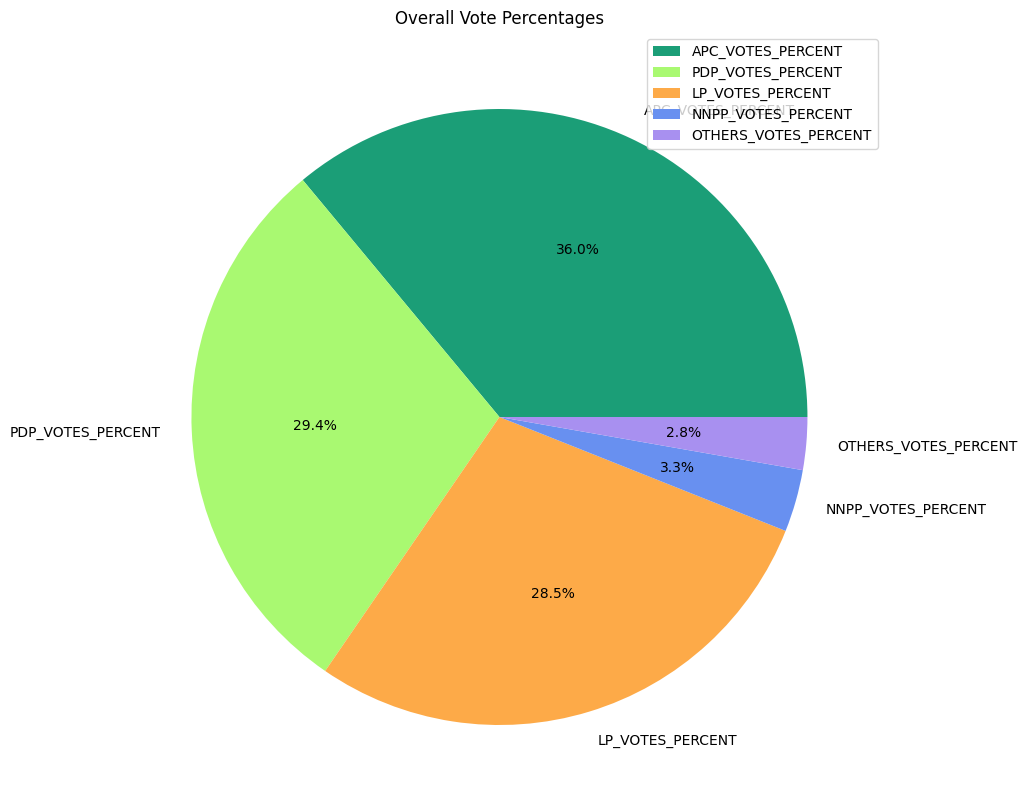

In [ ]:
# Compute overall vote percentages for each party
overall_percentages = df[['APC_VOTES_PERCENT', 'PDP_VOTES_PERCENT', 'LP_VOTES_PERCENT', 'NNPP_VOTES_PERCENT', 'OTHERS_VOTES_PERCENT']].mean()

# Plot pie chart of overall vote percentages
fig = plt.figure(figsize=(10, 10))
labels = overall_percentages.index
colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

plt.pie(overall_percentages, labels=labels, colors=colors, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Overall Vote Percentages')
plt.show()

###Total Valid Votes by State

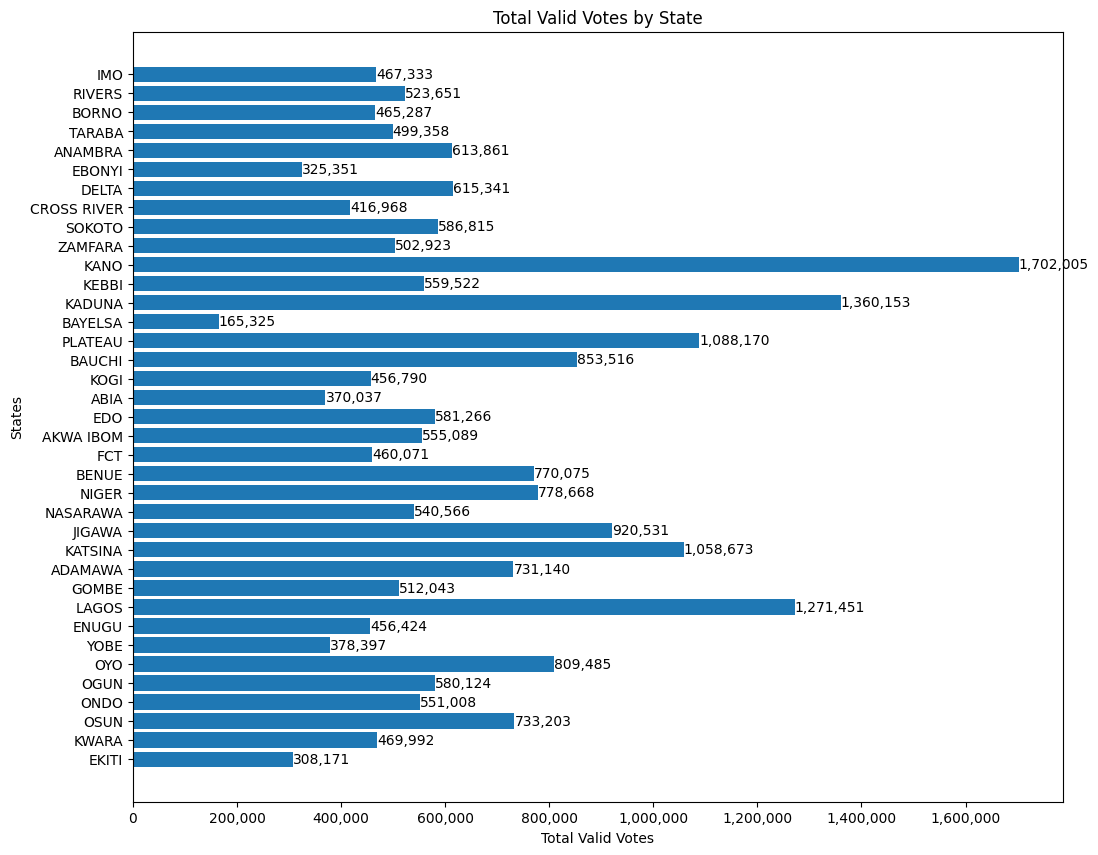

In [ ]:
# Plot bar chart of total valid votes by state
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(df['STATE'], df['TOTAL_VALID_VOTES'], color='#1f78b4')
plt.xlabel('Total Valid Votes')
plt.ylabel('States')
plt.title('Total Valid Votes by State')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Add data labels on the bars
for index, value in enumerate(df['TOTAL_VALID_VOTES']):
    plt.text(value, index, f'{value:,}', ha='left', va='center', fontsize=10)

plt.show()

###Each party's vote percentage by state



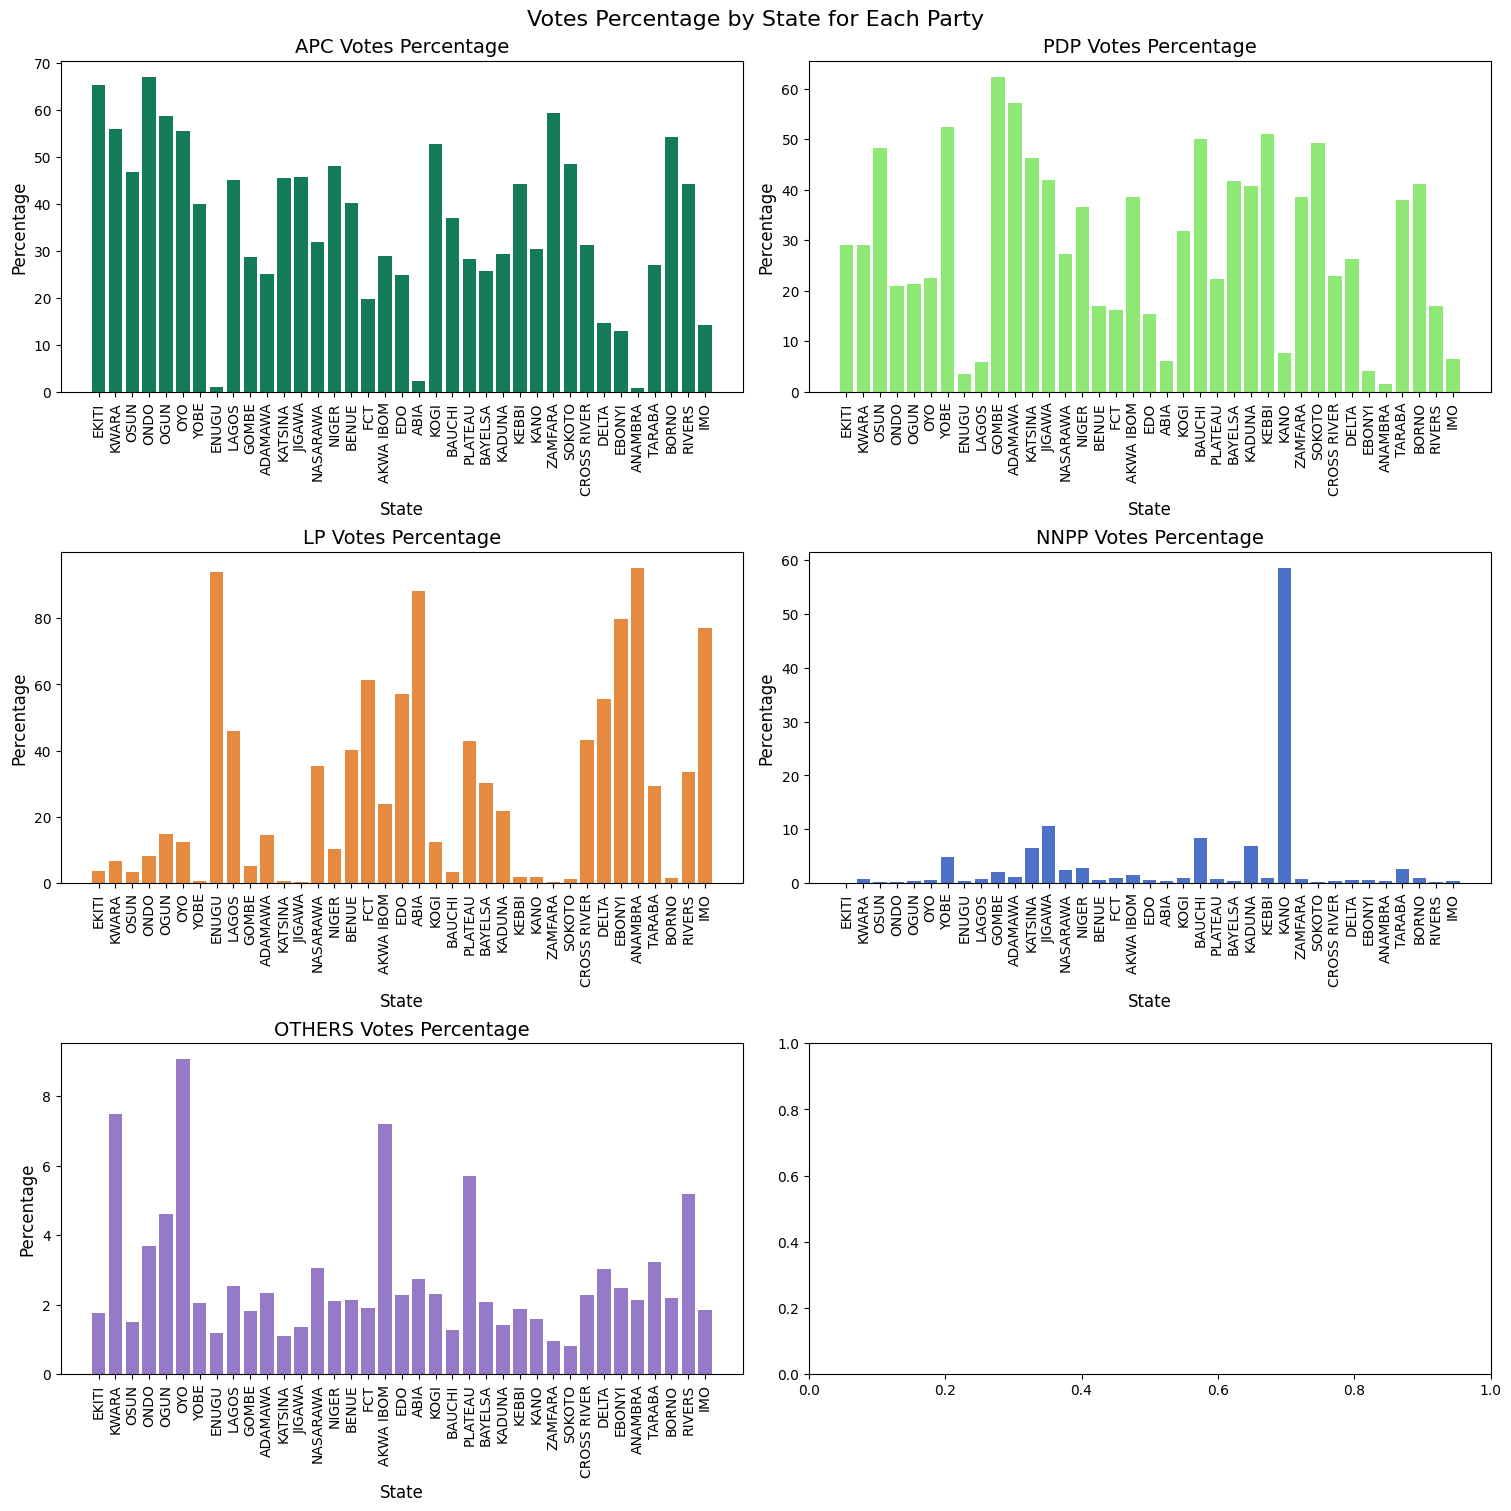

In [73]:
# Plot each party's votes percentage by state with wider x-axis labels and consistent colors
parties = ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), constrained_layout=True)
fig.suptitle('Votes Percentage by State for Each Party', fontsize=16)

colors = ['#147b58', '#8de876', '#e68a3f', '#4d70c8', '#967ac8']

for i, party in enumerate(parties):
    row = i // 2
    col = i % 2
    axs[row, col].bar(df['STATE'], df[f'{party}_VOTES_PERCENT'], color=colors[i])
    axs[row, col].set_title(f'{party} Votes Percentage', fontsize=14)
    axs[row, col].set_xlabel('State', fontsize=12)
    axs[row, col].set_ylabel('Percentage', fontsize=12)
    axs[row, col].tick_params(axis='x', rotation=90, labelsize=10)

plt.show()

###Each party's number of vote by state

In [ ]:
# Display Number of Votes by State for Each Party in a Table

# Create a new DataFrame for better organization
table_data = {
    'State': df['STATE'],
    'APC Votes': df['APC'],
    'PDP Votes': df['PDP'],
    'LP Votes': df['LP'],
    'NNPP Votes': df['NNPP'],
    'Other Votes': df['OTHERS']
}

table_df = pd.DataFrame(table_data)

# Display the table
table_df.style.hide_index()

# Calculate Total Votes for Each Party
total_votes = df[['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']].sum()

# Display Total Votes
total_votes_df = pd.DataFrame({'Party': total_votes.index, 'Total Votes': total_votes.values})
total_votes_df.style.hide_index()

<ipython-input-56-c9198b4c2824>:16: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  table_df.style.hide_index()
<ipython-input-56-c9198b4c2824>:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  total_votes_df.style.hide_index()


Party,Total Votes
APC,8805655
PDP,6984520
LP,6098588
NNPP,1496688
OTHERS,653332


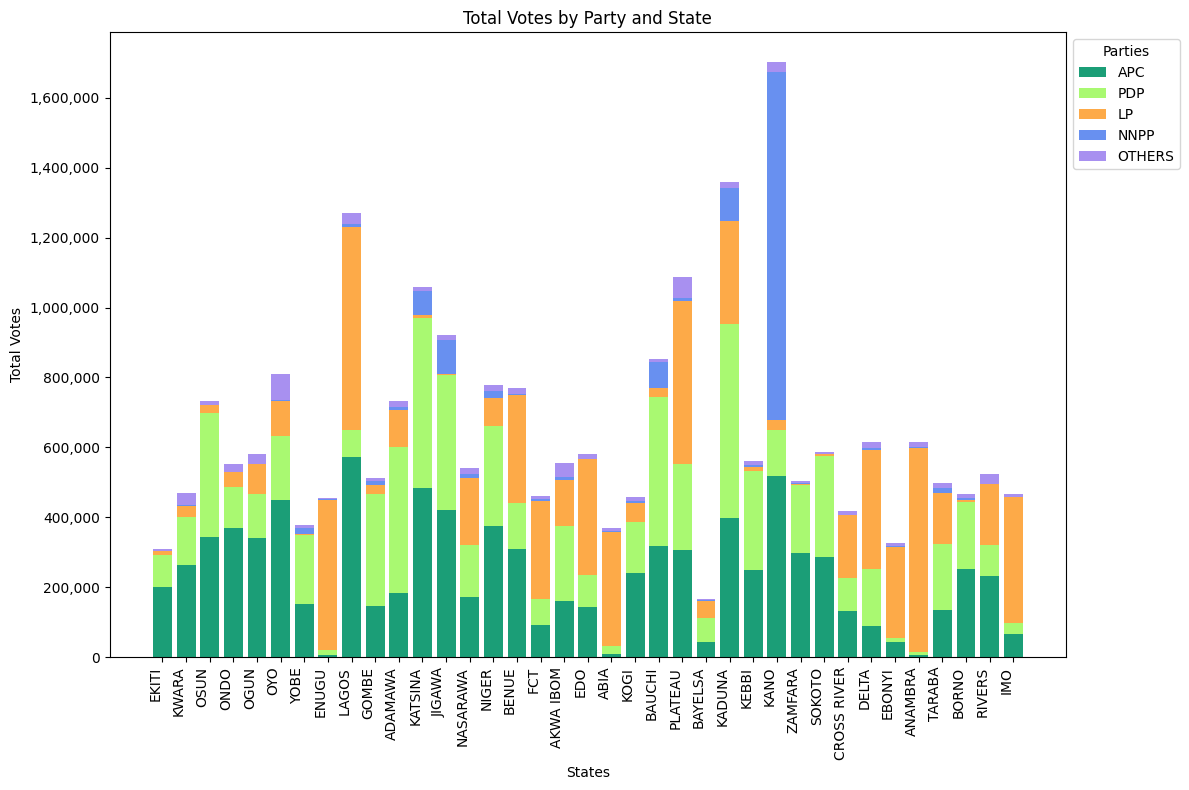

In [ ]:
# Plot stacked bar chart of each party's number of votes by state

fig, ax = plt.subplots(figsize=(12, 8))

parties = ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']
colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

for i, party in enumerate(parties):
    if i == 0:
        ax.bar(df['STATE'], df[party], label=party, color=colors[i])
    else:
        ax.bar(df['STATE'], df[party], bottom=df[parties[:i]].sum(axis=1), label=party, color=colors[i])

ax.set_ylabel('Total Votes')
ax.set_xlabel('States')
ax.set_title('Total Votes by Party and State')
ax.legend(title='Parties', bbox_to_anchor=(1, 1), loc='upper left')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

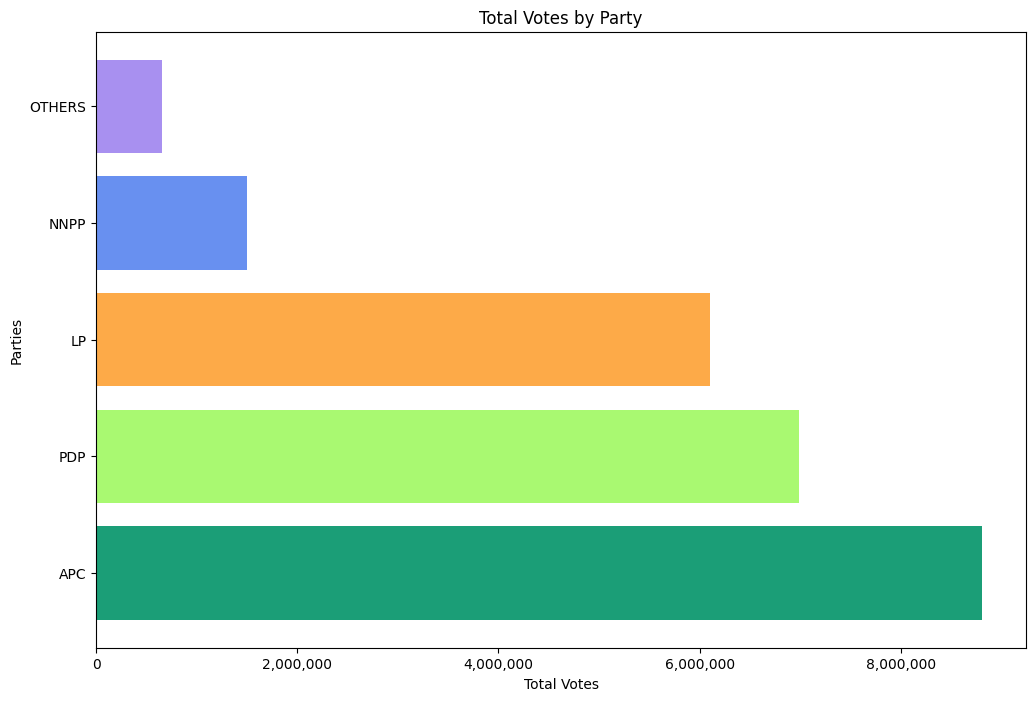

In [ ]:
# Plot horizontal bar chart for total votes by party
fig, ax = plt.subplots(figsize=(12, 8))
parties = ['APC', 'PDP', 'LP', 'NNPP', 'OTHERS']
total_votes_by_party = [df[party].sum() for party in parties]

ax.barh(parties, total_votes_by_party, color=['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0'])
ax.set_xlabel('Total Votes')
ax.set_ylabel('Parties')
ax.set_title('Total Votes by Party')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

###Percentage of Votes by Party

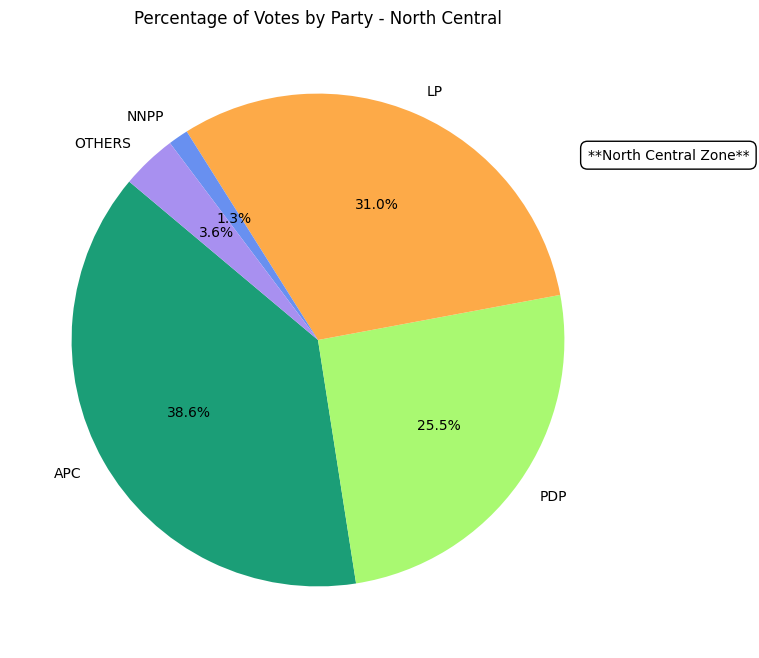

In [ ]:
#Plot for North Central
def plot_pie_chart(zone_name, party_votes):
    labels = party_votes.keys()
    sizes = party_votes.values()
    colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of Votes by Party - {zone_name}")

    # Add markdown text label
    plt.text(1.2, 0.8, f"**{zone_name} Zone**", horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

plot_pie_chart('North Central', party_votes_nc)

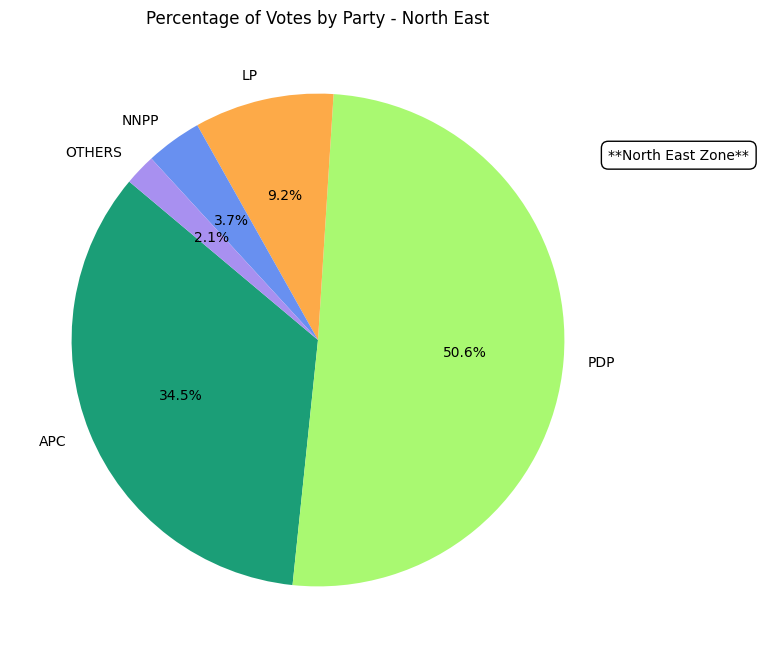

In [ ]:
#Plot for North East
def plot_pie_chart(zone_name, party_votes):
    labels = party_votes.keys()
    sizes = party_votes.values()
    colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of Votes by Party - {zone_name}")

    # Add markdown text label
    plt.text(1.2, 0.8, f"**{zone_name} Zone**", horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

plot_pie_chart('North East', party_votes_ne)

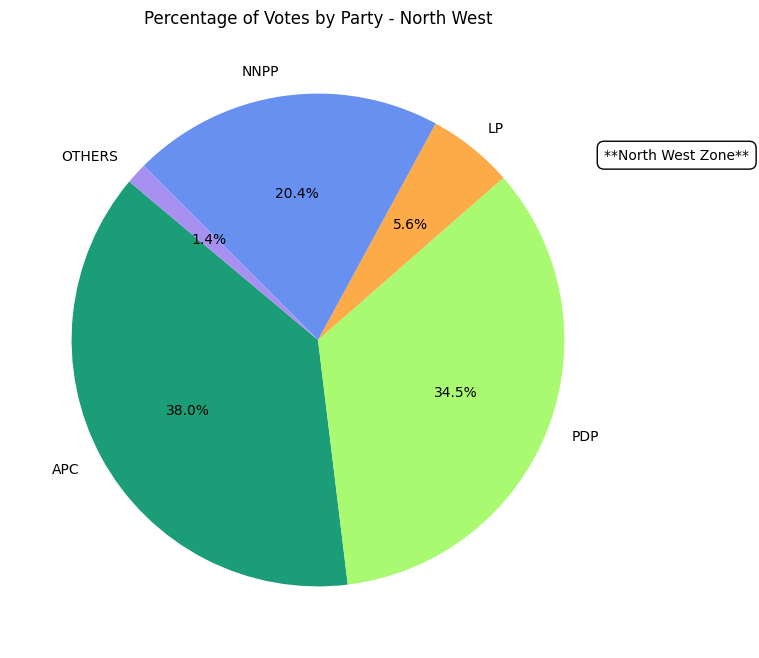

In [ ]:
#Plot for North West
def plot_pie_chart(zone_name, party_votes):
    labels = party_votes.keys()
    sizes = party_votes.values()
    colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of Votes by Party - {zone_name}")

    # Add markdown text label
    plt.text(1.2, 0.8, f"**{zone_name} Zone**", horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

plot_pie_chart('North West', party_votes_nw)

In [ ]:
#Plot for South East
def plot_pie_chart(zone_name, party_votes):
    labels = party_votes.keys()
    sizes = party_votes.values()
    colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of Votes by Party - {zone_name}")

    # Add markdown text label
    plt.text(1.2, 0.8, f"**{zone_name} Zone**", horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

plot_pie_chart('South East', party_votes_se)

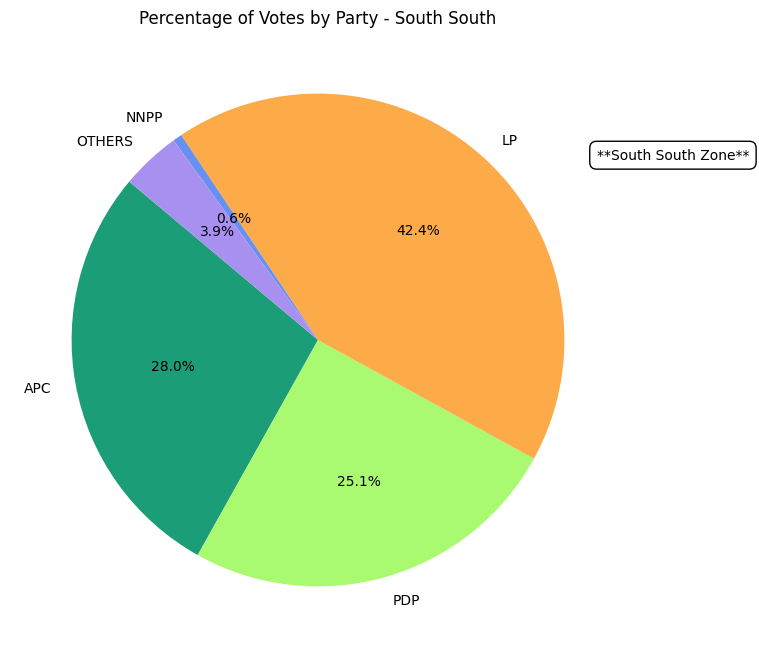

In [ ]:
#Plot for South South
def plot_pie_chart(zone_name, party_votes):
    labels = party_votes.keys()
    sizes = party_votes.values()
    colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of Votes by Party - {zone_name}")

    # Add markdown text label
    plt.text(1.2, 0.8, f"**{zone_name} Zone**", horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

plot_pie_chart('South South', party_votes_ss)

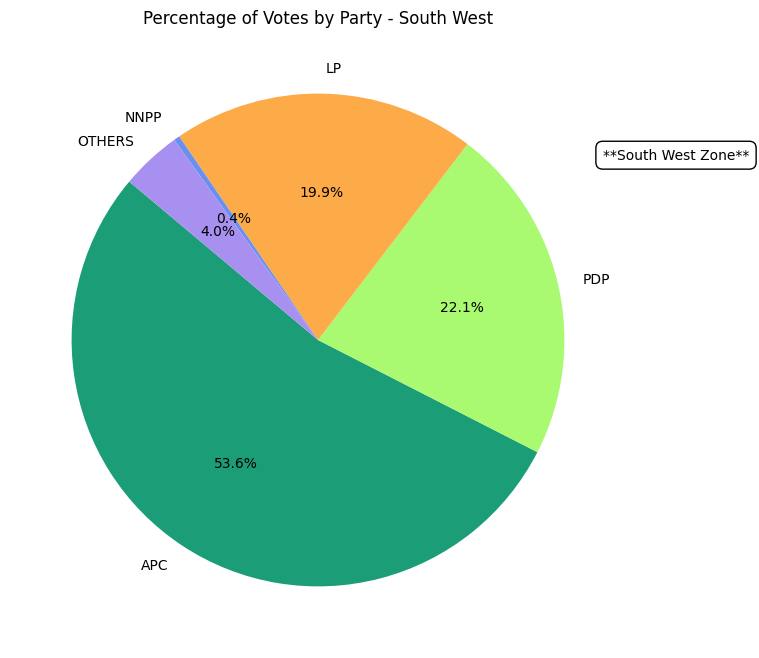

In [ ]:
#Plot for South West
def plot_pie_chart(zone_name, party_votes):
    labels = party_votes.keys()
    sizes = party_votes.values()
    colors = ['#1b9e77', '#a9f971', '#fdaa48', '#6890F0', '#A890F0']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Percentage of Votes by Party - {zone_name}")

    # Add markdown text label
    plt.text(1.2, 0.8, f"**{zone_name} Zone**", horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()

plot_pie_chart('South West', party_votes_sw)